# Sliding window
- univariate time series prediction
- predict one time step at a time into the future and feed that prediction back into the input window
- use window_size = 50
- use GradientBoostingRegressor() for simplicity

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report
from sklearn import ensemble
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('/Users/asumisaito/Downloads/dengue_features_train.csv')
df2 = pd.read_csv('/Users/asumisaito/Downloads/dengue_labels_train.csv')
data =  pd.merge(df, df2, on = ['city', 'year', 'weekofyear'])

In [3]:
import datetime
data['date'] = data['week_start_date'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

In [4]:
data[data.city=='sj'].date.describe()

count                     936
unique                    936
top       2000-05-13 00:00:00
freq                        1
first     1990-04-30 00:00:00
last      2008-04-22 00:00:00
Name: date, dtype: object

In [61]:
data = data.sort_values(by=['date'])
data.index = data['date']
sj = data[data.city == 'sj'].loc[:,['total_cases']]
sj.head(3)

,total_cases
date,
1990-04-30,4
1990-05-07,5
1990-05-14,4


In [62]:
# normalize features - 

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(sj.values)
series = pd.DataFrame(scaled)


/Users/asumisaito/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [63]:
# create train and test data

# use 670 rows as train
train = series.iloc[:670, :]
test = series.iloc[670:,:]


In [64]:
train.head()

,0
0,0.008677
1,0.010846
2,0.008677
3,0.006508
4,0.013015


In [65]:
test.head()

,0
670,0.015184
671,0.026030
672,0.006508
673,0.004338
674,0.015184


In [66]:
window_size = 50

series_s = train.copy()
for i in range(window_size):
    train = pd.concat([train, series_s.shift(-(i+1))], axis = 1)
    
train.dropna(axis=0, inplace=True)

In [43]:
train.shape

(620, 51)

In [47]:
X_train= train.iloc[:,:-1]
y_train = train.iloc[:,-1]

In [48]:
print(X_train.shape, y_train.shape)

(620, 50) (620,)


In [49]:
gb = ensemble.GradientBoostingRegressor()
gb.fit(X_train, y_train)
train_pred = gb.predict(X_train)

In [53]:
MAE = mean_absolute_error(y_train, train_pred)
print('mean absolute error: %.4f' % MAE)

mean absolute error: 0.0090


In [81]:
train.head()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.008677,0.010846,0.008677,0.006508,0.013015,0.004338,0.008677,0.010846,0.021692,0.013015,...,0.041215,0.054230,0.039046,0.045553,0.036876,0.036876,0.034707,0.034707,0.032538,0.049892
1,0.010846,0.008677,0.006508,0.013015,0.004338,0.008677,0.010846,0.021692,0.013015,0.017354,...,0.054230,0.039046,0.045553,0.036876,0.036876,0.034707,0.034707,0.032538,0.049892,0.034707
2,0.008677,0.006508,0.013015,0.004338,0.008677,0.010846,0.021692,0.013015,0.017354,0.004338,...,0.039046,0.045553,0.036876,0.036876,0.034707,0.034707,0.032538,0.049892,0.034707,0.036876
3,0.006508,0.013015,0.004338,0.008677,0.010846,0.021692,0.013015,0.017354,0.004338,0.013015,...,0.045553,0.036876,0.036876,0.034707,0.034707,0.032538,0.049892,0.034707,0.036876,0.026030
4,0.013015,0.004338,0.008677,0.010846,0.021692,0.013015,0.017354,0.004338,0.013015,0.036876,...,0.036876,0.036876,0.034707,0.034707,0.032538,0.049892,0.034707,0.036876,0.026030,0.036876


In [72]:
y_train.tail()

615    0.013015
616    0.013015
617    0.015184
618    0.021692
619    0.017354
Name: 0, dtype: float64

In [119]:
train2 =  series.iloc[:670, :]
np.array(train2)[669]

array([0.01735358])

In [120]:
series.head()

,0
0,0.008677
1,0.010846
2,0.008677
3,0.006508
4,0.013015


In [121]:
window_size = 50

series_s = train2.copy()
for i in range(window_size):
    train2 = pd.concat([train2, series_s.shift(-(i+1))], axis = 1)
    


In [122]:
train2.shape

(670, 51)

In [123]:
train2.tail()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
665,0.013015,0.013015,0.015184,0.021692,0.017354,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,0.013015,0.015184,0.021692,0.017354,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,0.015184,0.021692,0.017354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,0.021692,0.017354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,0.017354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
next_X = np.array(train2.iloc[620, :-1])
next_X

array([0.00650759, 0.01518438, 0.01301518, 0.0021692 , 0.00650759,
       0.00433839, 0.00433839, 0.0021692 , 0.02169197, 0.00650759,
       0.00650759, 0.0021692 , 0.0021692 , 0.00433839, 0.01301518,
       0.00650759, 0.00650759, 0.01084599, 0.00867679, 0.01518438,
       0.01301518, 0.01084599, 0.01518438, 0.01301518, 0.00867679,
       0.00867679, 0.01518438, 0.01952278, 0.01084599, 0.01084599,
       0.02169197, 0.01301518, 0.02819957, 0.01301518, 0.01084599,
       0.01084599, 0.01952278, 0.00650759, 0.01301518, 0.02386117,
       0.01518438, 0.01518438, 0.03253796, 0.01952278, 0.01301518,
       0.01301518, 0.01301518, 0.01518438, 0.02169197, 0.01735358])

In [99]:
next_X = np.array(train2.iloc[620, :-1])
#next_X
new_pred = gb.predict(next_X.reshape(1, -1))
new_pred

array([0.013558])

In [118]:
next_X

array([0.01301518, 0.0021692 , 0.00650759, 0.00433839, 0.00433839,
       0.0021692 , 0.02169197, 0.00650759, 0.00650759, 0.0021692 ,
       0.0021692 , 0.00433839, 0.01301518, 0.00650759, 0.00650759,
       0.01084599, 0.00867679, 0.01518438, 0.01301518, 0.01084599,
       0.01518438, 0.01301518, 0.00867679, 0.00867679, 0.01518438,
       0.01952278, 0.01084599, 0.01084599, 0.02169197, 0.01301518,
       0.02819957, 0.01301518, 0.01084599, 0.01084599, 0.01952278,
       0.00650759, 0.01301518, 0.02386117, 0.01518438, 0.01518438,
       0.03253796, 0.01952278, 0.01301518, 0.01301518, 0.01301518,
       0.01518438, 0.02169197, 0.01735358, 0.01475614,        nan])

In [103]:
train3 = train2.append(pd.DataFrame(new_pred))
train3.tail()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
666,0.013015,0.015184,0.021692,0.017354,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,0.015184,0.021692,0.017354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,0.021692,0.017354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,0.017354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.013558,0.013558,0.013558,0.013558,0.013558,0.013558,0.013558,0.013558,0.013558,0.013558,...,0.013558,0.013558,0.013558,0.013558,0.013558,0.013558,0.013558,0.013558,0.013558,0.013558


In [110]:
train3 =  series.iloc[:670, :]
train3 = train3.append(pd.DataFrame(new_pred))
train3.tail()

,0
666,0.013015
667,0.015184
668,0.021692
669,0.017354
0,0.013558


In [111]:
window_size = 50

series_s = train3.copy()
for i in range(window_size):
    train3 = pd.concat([train3, series_s.shift(-(i+1))], axis = 1)

In [112]:
next_X = np.array(train3.iloc[621, :-1])
#next_X
new_pred = gb.predict(next_X.reshape(1, -1))
new_pred

array([0.01475614])

In [113]:
test.head(2)

,0
670,0.015184
671,0.026030


In [140]:
### THIS!! ###

train2 =  series.iloc[:670, :]

for j in range(0, 50):
    window_size = 50
    series_s = train2.copy()
    for i in range(window_size):
        train2 = pd.concat([train2, series_s.shift(-(i+1))], axis = 1)

    next_X = np.array(train2.iloc[620+j, :-1])
    new_pred = gb.predict(next_X.reshape(1, -1))
    new_pred

    train_new =  train2.iloc[:,0]
    train2 = train_new.append(pd.DataFrame(new_pred))



In [142]:
train2.index = range(len(train2))

In [143]:
train2.tail()

,0
715,0.01
716,0.01
717,0.01
718,0.01
719,0.01


In [147]:
y_pred = train2.iloc[670:, :]
y_pred.head()

,0
670,0.013558
671,0.014756
672,0.013192
673,0.010094
674,0.009678


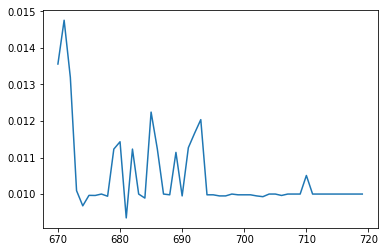

In [156]:
plt.plot(y_pred)
plt.show()

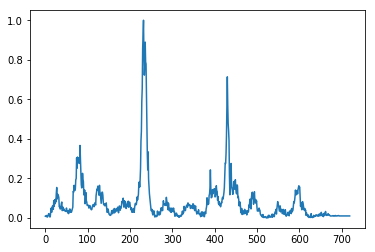

In [157]:
plt.plot(train2)
plt.show()

In [148]:
y_pred.shape

(50, 1)

In [155]:
y_pred.tail(20)

,0
700,0.009979
701,0.009979
702,0.009949
703,0.009928
704,0.010000
705,0.010000
706,0.009962
707,0.010000
708,0.010000
709,0.010000


In [149]:
test.shape

(266, 1)

In [150]:
test.head()

,0
670,0.015184
671,0.026030
672,0.006508
673,0.004338
674,0.015184


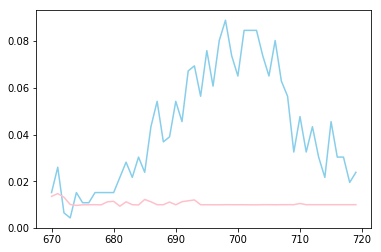

In [154]:
y_test = test.iloc[:50,:]
plt.plot(y_test, color = 'skyblue')
plt.plot(y_pred, color = 'pink')
plt.show()

In [ ]:
# NOT GOOD